<a href="https://colab.research.google.com/github/Hongyongmin/Edwith-Pytorch/blob/main/7_2_MNIST_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋은 손으로 쓰여진 숫자 이미지 데이터 셋을 뜻함





6만장의 이미지와 레이블로 트레인 셋이 구성되어지고

만장의 이미지와 레이블로 테스트 셋이 구성되어짐

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
training_epochs = 15
batch_size = 100

In [ ]:

mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = transforms.ToTensor(),download=True)
mnist_test = dsets.MNIST(root = "MNIST-data/", train = False, transform = transforms.ToTensor(), download=True)



Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!




/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting MNIST-data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST-data/MNIST/raw


Extracting MNIST-data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST-data/MNIST/raw
Processing...
Done!


In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [ ]:
linear = torch.nn.Linear(784, 10, bias =True).to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    X=X.view(-1, 28 * 28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))

print('Learning finished')




Epoch: 0001 cost= 0.534912467
Epoch: 0002 cost= 0.359308630
Epoch: 0003 cost= 0.331088215
Epoch: 0004 cost= 0.316574216
Epoch: 0005 cost= 0.307130307
Epoch: 0006 cost= 0.300207853
Epoch: 0007 cost= 0.294897288
Epoch: 0008 cost= 0.290830463
Epoch: 0009 cost= 0.287419587
Epoch: 0010 cost= 0.284589052
Epoch: 0011 cost= 0.281816214
Epoch: 0012 cost= 0.279919624
Epoch: 0013 cost= 0.277836829
Epoch: 0014 cost= 0.276022345
Epoch: 0015 cost= 0.274443209
Learning finished


Accuracy: 0.8867999911308289
Label:  7
Prediction:  7


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


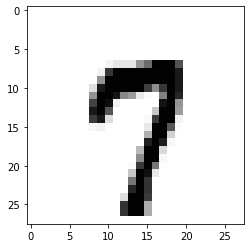

In [ ]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction,1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) -1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation = 'nearest')
  plt.show()